Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 2482767.7500
Epoch 2/200
1/1 [==============================] - 0s 15ms/step - loss: 2482748.5000
Epoch 3/200
1/1 [==============================] - 0s 14ms/step - loss: 2482734.0000
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 2482721.7500
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 2482711.2500
Epoch 6/200
1/1 [==============================] - 0s 13ms/step - loss: 2482701.2500
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 2482692.0000
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 2482683.0000
Epoch 9/200
1/1 [==============================] - 0s 11ms/step - loss: 2482674.2500
Epoch 10/200
1/1 [==============================] - 0s 12ms/step - loss: 2482665.7500
Epoch 11/200
1/1 [==============================] - 0s 10ms/step - loss: 2482657.7500
Epoch 12/200
1/1 [==============================] - 0s 11ms/step 

array([[7.895718]], dtype=float32)

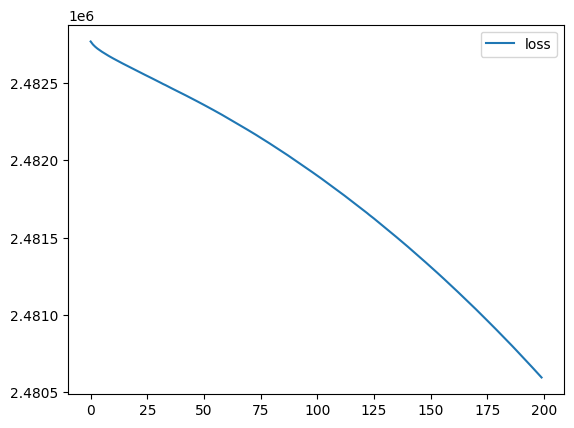

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('ex1').sheet1
data = worksheet.get_all_values()
dataset1=pd.DataFrame(data[1:],columns=data[0])
dataset1=dataset1.astype({'input':'float'})
dataset1=dataset1.astype({'output':'float'})
dataset1.head()
X = dataset1[['input']].values
y = dataset1[['output']].values
X
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train1,y_train,epochs=200)
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()
X_test1 = Scaler.transform(X_test)
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)
